In [1]:
#Import the required libraries.
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

2023-12-24 17:38:05.594743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-24 17:38:05.664973: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-24 17:38:05.685264: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-24 17:38:06.090340: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
#Load the Resturant Reviews Data Set to a Numpy Array.
resturant_review_data = pd.read_csv("DataSet.csv")
resturant_review_data = np.array(resturant_review_data)

In [3]:
# Define the HyperParameters.
vocab_size = 10000
embedding_dim = 64
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
num_epochs = 300

In [4]:
#Sepetate the Labels and the Reviews to X and y variables.
X = resturant_review_data[:,0]
y = resturant_review_data[:,1]

In [5]:
#Performing test train split with SKlearn  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
#Saving the training vocabulary for later use.

# Convert NumPy arrays to Python lists
X_train_list = X_train.tolist()

# Write to JSON file
with open('Vocabulary.json', 'w') as json_file:
    json.dump(X_train_list, json_file)

In [7]:
#Using the Tensor Flow Tokenizer to generate the Word index
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [8]:
#Using the Tensor Flow Tokenizer to generate the numeric sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
#Converting the labels and sequences to Numpy Array

training_padded = np.array(training_padded).astype(np.float32)
training_labels = np.array(y_train).astype(np.float32)
testing_padded = np.array(testing_padded).astype(np.float32)
testing_labels = np.array(y_test).astype(np.float32)

In [10]:
#Creating the ANN with Embedding Layer to perform the classification

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.00005)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

2023-12-24 17:38:09.950390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-24 17:38:09.957291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-24 17:38:09.957539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-24 17:38:09.959768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [11]:
#Model Preview
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                        

In [12]:
#Training the model for 300 epochs
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/300
25/25 - 1s - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.4800 - 769ms/epoch - 31ms/step
Epoch 2/300
25/25 - 0s - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.4800 - 47ms/epoch - 2ms/step
Epoch 3/300


2023-12-24 17:38:11.831991: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


25/25 - 0s - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4800 - 46ms/epoch - 2ms/step
Epoch 4/300
25/25 - 0s - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4800 - 45ms/epoch - 2ms/step
Epoch 5/300
25/25 - 0s - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4800 - 44ms/epoch - 2ms/step
Epoch 6/300
25/25 - 0s - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.4800 - 46ms/epoch - 2ms/step
Epoch 7/300
25/25 - 0s - loss: 0.6930 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4800 - 44ms/epoch - 2ms/step
Epoch 8/300
25/25 - 0s - loss: 0.6930 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4800 - 45ms/epoch - 2ms/step
Epoch 9/300
25/25 - 0s - loss: 0.6930 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4800 - 44ms/epoch - 2ms/step
Epoch 10/300
25/25 - 0s - loss: 0.6929 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4800 - 45ms/epoch - 2ms/step
Epoch 11/300
25/25 - 0s - l

Epoch 70/300
25/25 - 0s - loss: 0.6825 - accuracy: 0.6375 - val_loss: 0.6885 - val_accuracy: 0.5600 - 44ms/epoch - 2ms/step
Epoch 71/300
25/25 - 0s - loss: 0.6818 - accuracy: 0.6875 - val_loss: 0.6882 - val_accuracy: 0.5600 - 44ms/epoch - 2ms/step
Epoch 72/300
25/25 - 0s - loss: 0.6813 - accuracy: 0.6913 - val_loss: 0.6880 - val_accuracy: 0.5600 - 43ms/epoch - 2ms/step
Epoch 73/300
25/25 - 0s - loss: 0.6807 - accuracy: 0.6737 - val_loss: 0.6877 - val_accuracy: 0.5600 - 46ms/epoch - 2ms/step
Epoch 74/300
25/25 - 0s - loss: 0.6801 - accuracy: 0.6675 - val_loss: 0.6874 - val_accuracy: 0.5650 - 43ms/epoch - 2ms/step
Epoch 75/300
25/25 - 0s - loss: 0.6794 - accuracy: 0.7113 - val_loss: 0.6872 - val_accuracy: 0.5650 - 44ms/epoch - 2ms/step
Epoch 76/300
25/25 - 0s - loss: 0.6788 - accuracy: 0.6862 - val_loss: 0.6868 - val_accuracy: 0.5850 - 42ms/epoch - 2ms/step
Epoch 77/300
25/25 - 0s - loss: 0.6781 - accuracy: 0.6750 - val_loss: 0.6866 - val_accuracy: 0.5600 - 44ms/epoch - 2ms/step
Epoch 78

Epoch 136/300
25/25 - 0s - loss: 0.5832 - accuracy: 0.8700 - val_loss: 0.6450 - val_accuracy: 0.6900 - 43ms/epoch - 2ms/step
Epoch 137/300
25/25 - 0s - loss: 0.5807 - accuracy: 0.8587 - val_loss: 0.6448 - val_accuracy: 0.6800 - 45ms/epoch - 2ms/step
Epoch 138/300
25/25 - 0s - loss: 0.5783 - accuracy: 0.8662 - val_loss: 0.6436 - val_accuracy: 0.6850 - 44ms/epoch - 2ms/step
Epoch 139/300
25/25 - 0s - loss: 0.5760 - accuracy: 0.8700 - val_loss: 0.6425 - val_accuracy: 0.6850 - 45ms/epoch - 2ms/step
Epoch 140/300
25/25 - 0s - loss: 0.5733 - accuracy: 0.8675 - val_loss: 0.6407 - val_accuracy: 0.7050 - 44ms/epoch - 2ms/step
Epoch 141/300
25/25 - 0s - loss: 0.5708 - accuracy: 0.8750 - val_loss: 0.6405 - val_accuracy: 0.6900 - 45ms/epoch - 2ms/step
Epoch 142/300
25/25 - 0s - loss: 0.5687 - accuracy: 0.8487 - val_loss: 0.6388 - val_accuracy: 0.7050 - 44ms/epoch - 2ms/step
Epoch 143/300
25/25 - 0s - loss: 0.5658 - accuracy: 0.8800 - val_loss: 0.6375 - val_accuracy: 0.7100 - 44ms/epoch - 2ms/step


Epoch 202/300
25/25 - 0s - loss: 0.4020 - accuracy: 0.9362 - val_loss: 0.5675 - val_accuracy: 0.7600 - 44ms/epoch - 2ms/step
Epoch 203/300
25/25 - 0s - loss: 0.3991 - accuracy: 0.9362 - val_loss: 0.5648 - val_accuracy: 0.7600 - 45ms/epoch - 2ms/step
Epoch 204/300
25/25 - 0s - loss: 0.3965 - accuracy: 0.9425 - val_loss: 0.5642 - val_accuracy: 0.7600 - 43ms/epoch - 2ms/step
Epoch 205/300
25/25 - 0s - loss: 0.3934 - accuracy: 0.9425 - val_loss: 0.5635 - val_accuracy: 0.7500 - 42ms/epoch - 2ms/step
Epoch 206/300
25/25 - 0s - loss: 0.3908 - accuracy: 0.9413 - val_loss: 0.5602 - val_accuracy: 0.7600 - 46ms/epoch - 2ms/step
Epoch 207/300
25/25 - 0s - loss: 0.3878 - accuracy: 0.9438 - val_loss: 0.5598 - val_accuracy: 0.7600 - 44ms/epoch - 2ms/step
Epoch 208/300
25/25 - 0s - loss: 0.3855 - accuracy: 0.9413 - val_loss: 0.5565 - val_accuracy: 0.7700 - 44ms/epoch - 2ms/step
Epoch 209/300
25/25 - 0s - loss: 0.3823 - accuracy: 0.9463 - val_loss: 0.5588 - val_accuracy: 0.7600 - 46ms/epoch - 2ms/step


Epoch 268/300
25/25 - 0s - loss: 0.2231 - accuracy: 0.9750 - val_loss: 0.4847 - val_accuracy: 0.7750 - 45ms/epoch - 2ms/step
Epoch 269/300
25/25 - 0s - loss: 0.2205 - accuracy: 0.9750 - val_loss: 0.4825 - val_accuracy: 0.7750 - 44ms/epoch - 2ms/step
Epoch 270/300
25/25 - 0s - loss: 0.2183 - accuracy: 0.9775 - val_loss: 0.4805 - val_accuracy: 0.7750 - 46ms/epoch - 2ms/step
Epoch 271/300
25/25 - 0s - loss: 0.2159 - accuracy: 0.9787 - val_loss: 0.4809 - val_accuracy: 0.7750 - 45ms/epoch - 2ms/step
Epoch 272/300
25/25 - 0s - loss: 0.2137 - accuracy: 0.9787 - val_loss: 0.4809 - val_accuracy: 0.7700 - 44ms/epoch - 2ms/step
Epoch 273/300
25/25 - 0s - loss: 0.2115 - accuracy: 0.9800 - val_loss: 0.4784 - val_accuracy: 0.7800 - 44ms/epoch - 2ms/step
Epoch 274/300
25/25 - 0s - loss: 0.2096 - accuracy: 0.9787 - val_loss: 0.4825 - val_accuracy: 0.7850 - 46ms/epoch - 2ms/step
Epoch 275/300
25/25 - 0s - loss: 0.2067 - accuracy: 0.9762 - val_loss: 0.4772 - val_accuracy: 0.7800 - 45ms/epoch - 2ms/step


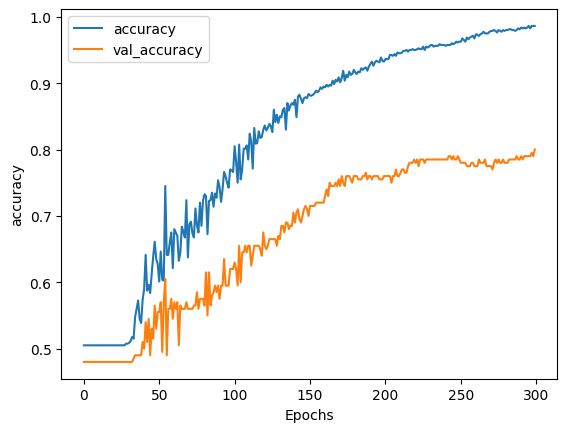

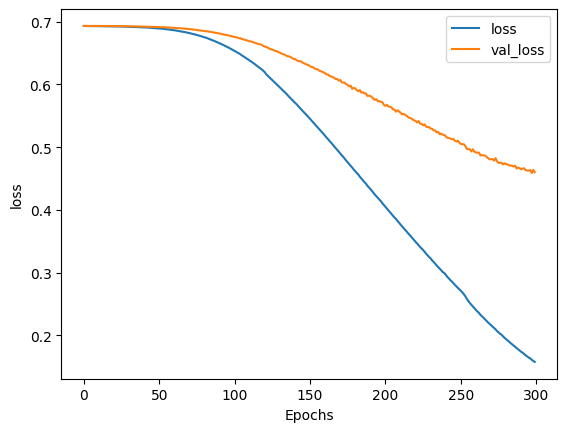

In [13]:
#Plotting the Accuracy and Loss factors
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
#Testing the model on some sentences.
sentence = ["Crust is not good.", "The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.","Loved this place , found it by accident."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 50ms/step
[[0.30309334]
 [0.11109927]
 [0.876077  ]]


In [15]:
#Saving the model
model.save('sentiment_analysis_model.h5')